In [7]:
import numpy as np 
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib as mpl
import math
import random
from scipy.stats import multivariate_normal


C:\Users\anifa\AppData\Local\Temp\ipykernel_17924\194347837.py:96: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('PuBuGn')
C:\Users\anifa\AppData\Local\Temp\ipykernel_17924\194347837.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')


[1.985515773884151e-19, 6.5111011125701456e-18, 8.438197040294966e-18, 3.092986411294325e-17, 8.550294574115623e-17, 1.70068348161022e-16, 1.7612890832352569e-15, 2.451401582230498e-15, 2.746721693893244e-15, 2.75130158710536e-15, 7.955202325163766e-15, 8.428040956454773e-15, 1.515495803912258e-14, 1.670903158401432e-14, 2.081984173589394e-14, 2.2871459069399414e-14, 2.6517856720856805e-14, 2.684266679935238e-14, 2.867811323892736e-14, 3.504519224317249e-14, 3.55598405505671e-14, 4.179171027386003e-14, 5.981519948414404e-14, 7.036216721536053e-14, 7.842173839278678e-14, 8.679380462880838e-14, 2.1994195010052083e-13, 4.2645211142242067e-13, 4.286310418831944e-13, 4.409786787391808e-13, 4.582153925422556e-13, 5.720705934880593e-13, 6.044164666804511e-13, 6.39289860759055e-13, 6.511340279964804e-13, 8.260346582850118e-13, 8.357461194483352e-13, 9.188662742876688e-13, 9.320353534743444e-13, 1.0333721830664399e-12, 1.0850158813558504e-12, 1.118434223050031e-12, 1.3651531969576286e-12, 1.469

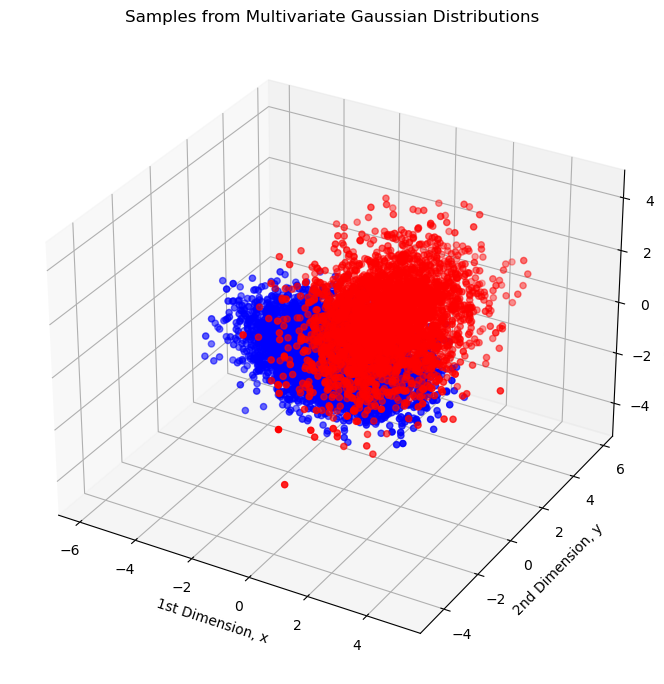

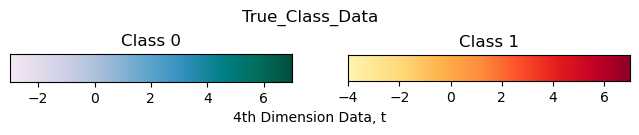

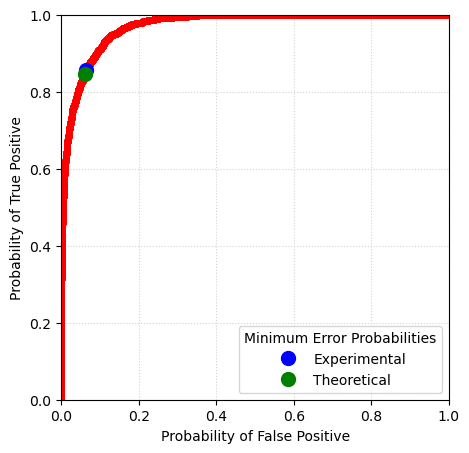

In [8]:
# We are storing given mean mean vector first class and second class
mean_vector_0 = [-1, 1, -1, 1]
mean_vector_1 = [1, 1, 1, 1]

#Creating given covariance matrix first class and second class. 
conv_mat_0 = [[2, -0.5, 0.3, 0],
             [-0.5, 1, -0.5, 0],
             [0.3, -0.5, 1, 0],
             [0, 0, 0, 2]]
conv_mat_1 = [[1, 0.3, -0.2, 0],
             [0.3, 2, 0.3, 0],
             [-0.2, 0.3, 1, 0],
             [0, 0, 0, 3]]
'''
Create 10,000 samples based on a multivariate Gaussian distribution, ensuring each sample includes a class label represented by 0 or 1. 
The dataset should consist of four dimensions along with an additional dimension for the class labels.
'''

rng = default_rng()
overall_size = 10000   
p_0 = 0.7
p_1 = 0.3
size_0 = 0
size_1 = 0



for i in range(0, overall_size):
    if(random.random() <p_0):
        size_0 = size_0 + 1
    else:
        size_1 = size_1 + 1

samples_0 = rng.multivariate_normal(mean_vector_0, conv_mat_0,size_0)
samples_0 = pd.DataFrame(samples_0, columns=['x','y','z','t',])
samples_0['True_Class_Data'] = 0

# print(samples_0)


samples_1 = rng.multivariate_normal(mean_vector_1, conv_mat_1, size_1)
samples_1 = pd.DataFrame(samples_1, columns=['x','y','z','t'])
samples_1['True_Class_Data'] = 1
samples = pd.concat([samples_0, samples_1])

# print(samples)

samples.to_csv(r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Problem_1\samples_correct_values.csv')

# samples = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\Ml-course\samples_correct_values.csv', index_col=0)

fig = plt.figure(figsize = (10,7))
fig.subplots_adjust(left=0.01, right=0.99, top=0.96, bottom=0.04, wspace=0)
ax = plt.axes(projection ="3d")
samples = samples.sort_values('t')
samples_0 = samples[samples['True_Class_Data']==0]
samples_1 = samples[samples['True_Class_Data']==1]

# print(samples_0)
# print(samples_1)
# print(samples)

x_0 = samples_0['x'].tolist()
y_0 = samples_0['y'].tolist()
z_0 = samples_0['z'].tolist()
t_0 = samples_0['t'].tolist()

# print(x_0)
# print(y_0)
# print(z_0)
# print(t_0)

x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
t_1 = samples_1['t'].tolist()

# print(x_1)
# print(y_1)
# print(z_1)
# print(t_1)

C = np.linspace(-5, 5, len(t_0))
scamap = plt.cm.ScalarMappable()
ax.scatter3D(x_0, y_0, z_0,color='Blue', label='0')

C =np.linspace(-5, 5, len(t_1))
scamp = plt.cm.ScalarMappable()
ax.scatter3D(x_1,y_1,z_1, color='red', label='1')

ax.set_title("Samples from Multivariate Gaussian Distributions")
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
plt.savefig(r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Problem_1\fourthdimensiondata.png')
# plt.clf()

fig, axes = plt.subplots(1,2,figsize=(8,1.2))
fig.suptitle('True_Class_Data')
fig.text(0.5,0.08, '4th Dimension Data, t', ha='center', va='center')
cmap = plt.cm.get_cmap('PuBuGn')
colors = cmap(np.arange(cmap.N))
axes[0].imshow([colors], extent=[min(t_0), max(t_0), 0, 1])
axes[0].set_yticklabels([])
axes[0].set_yticks([])
axes[0].set_ylim(0,1)
axes[0].set_xlim(math.ceil(min(t_0)),math.floor(max(t_0)))
axes[0].set_title('Class 0')


cmap = plt.cm.get_cmap('YlOrRd')
colors = cmap(np.arange(cmap.N))
axes[1].imshow([colors], extent=[min(t_1), max(t_1), 0, 1])
axes[1].set_yticklabels([])
axes[1].set_yticks([])
axes[1].set_ylim(0,1)
axes[1].set_xlim(math.ceil(min(t_1)),math.floor(max(t_1)))
axes[1].set_title('Class 1')
plt.savefig(r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Problem_1\legends.png')
#Now we will im[lement the classifier]
# print(samples)
N_discriminants = []

for i in range(0, samples.shape[0]):
    sample = samples.iloc[i].to_numpy()[:-1]
    discriminant = multivariate_normal.pdf(sample, mean_vector_1, conv_mat_1)/multivariate_normal.pdf(sample, mean_vector_0, conv_mat_0)
    # print(discriminant)
    N_discriminants.append(discriminant)
    # print(N_discriminants)

samples['Discriminant'] = N_discriminants
# print(samples['discriminants'])

samples = samples.sort_values('Discriminant')
dis_0 = samples[samples['True_Class_Data']==0]['Discriminant'].tolist()
print(dis_0)
dis_1 = samples[samples['True_Class_Data']==1]['Discriminant'].tolist()
print(dis_1)

df = pd.DataFrame(columns=['False_Positive', 'True_Positive', 'Gama', 'Probability_Error'])
for index, row in samples.iterrows():
    discriminant = row['Discriminant']
    false_positive = len([class_dis for class_dis in dis_0 if class_dis>=discriminant])/len(dis_0)
    true_positive = len([class_dis for class_dis in dis_1 if class_dis>=discriminant])/len(dis_1)
    p_err = false_positive*0.7 + (1-true_positive)*0.3
    d = {'False_Positive': false_positive, 'True_Positive': true_positive, 'Gama': discriminant, 'Probability_Error': p_err}
    d_df = pd.DataFrame([d])
    df = pd.concat([df,d_df], ignore_index=True)

df = df.sort_values('Probability_Error')
# print(df)

# Get info of minimum experimental probablility error
exp_min = df.iloc[0]
print('Experimental Minimum Error Info:\n')
print(exp_min)


#Calculate theoretical error
theoretical_gama = 0.7/0.3
theoretical_lambdas = [len([class_dis for class_dis in dis_0 if class_dis>=theoretical_gama])/len(dis_0), len([class_dis for class_dis in dis_1 if class_dis>=theoretical_gama])/len(dis_1)]
theoretical_p_err = theoretical_lambdas[0]*0.7 + (1-theoretical_lambdas[1])*0.3
theoretical_min = {'False_Positive': theoretical_lambdas[0], 'True_Positive': theoretical_lambdas[1], 'Gama': theoretical_gama, 'Probability_Error': theoretical_p_err}
print('Theoretical Mimimum Error Info:\n')
print(theoretical_min)


fig, ax = plt.subplots(1,1, figsize=(5,5))
#Plot ROC curve
ax.plot(df['False_Positive'], df['True_Positive'], 'ro', markersize=4 )

# Plot experimental minimum
ax.plot(exp_min['False_Positive'], exp_min['True_Positive'], 'bo', label='Experimental', markersize=10)
# Plot theorectical minimum
ax.plot(theoretical_min['False_Positive'], theoretical_min['True_Positive'], 'go', label='Theoretical', markersize=10)
ax.legend(title='Minimum Error Probabilities', loc='lower right')
#ax.set_title('Minimum Expected Risk ROC Curve')
ax.set_xlabel('Probability of False Positive')
ax.set_ylabel('Probability of True Positive')
ax.yaxis.grid(color='lightgrey', linestyle=':')
ax.xaxis.grid(color='lightgrey', linestyle=':')
ax.set_axisbelow(True)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.savefig(r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Problem_1\curve.png')




